# Load Data From Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import zipfile
def extract_zip(zip_file_path):
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall()
zip_file_path = '/content/drive/MyDrive/dataset.zip'
extract_zip(zip_file_path)

# Importing Necessary Libraries

In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import load_model


# Importing Dataset

In [4]:
train_dir = '/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train'
test_dir = '/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid'

# Augmentation Of Data

In [5]:
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values to [0,1]
    rotation_range=20,  # Randomly rotate images by up to 20 degrees
    width_shift_range=0.2,  # Randomly shift images horizontally
    height_shift_range=0.2,  # Randomly shift images vertically
    shear_range=0.2,  # Shear intensity
    zoom_range=0.2,  # Randomly zoom into images
    horizontal_flip=True,  # Randomly flip images horizontally
    fill_mode='nearest'  # Fill mode for filling in newly created pixels
)

test_datagen = ImageDataGenerator(rescale=1./255)  # Only rescale for testing data


# Making Train and Test Data

In [9]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),  # Resize images to 224x224
    batch_size=32,
    class_mode='categorical'  # Use categorical mode for multi-class classification
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)


Found 70295 images belonging to 38 classes.
Found 17572 images belonging to 38 classes.


# Augmented Training Data

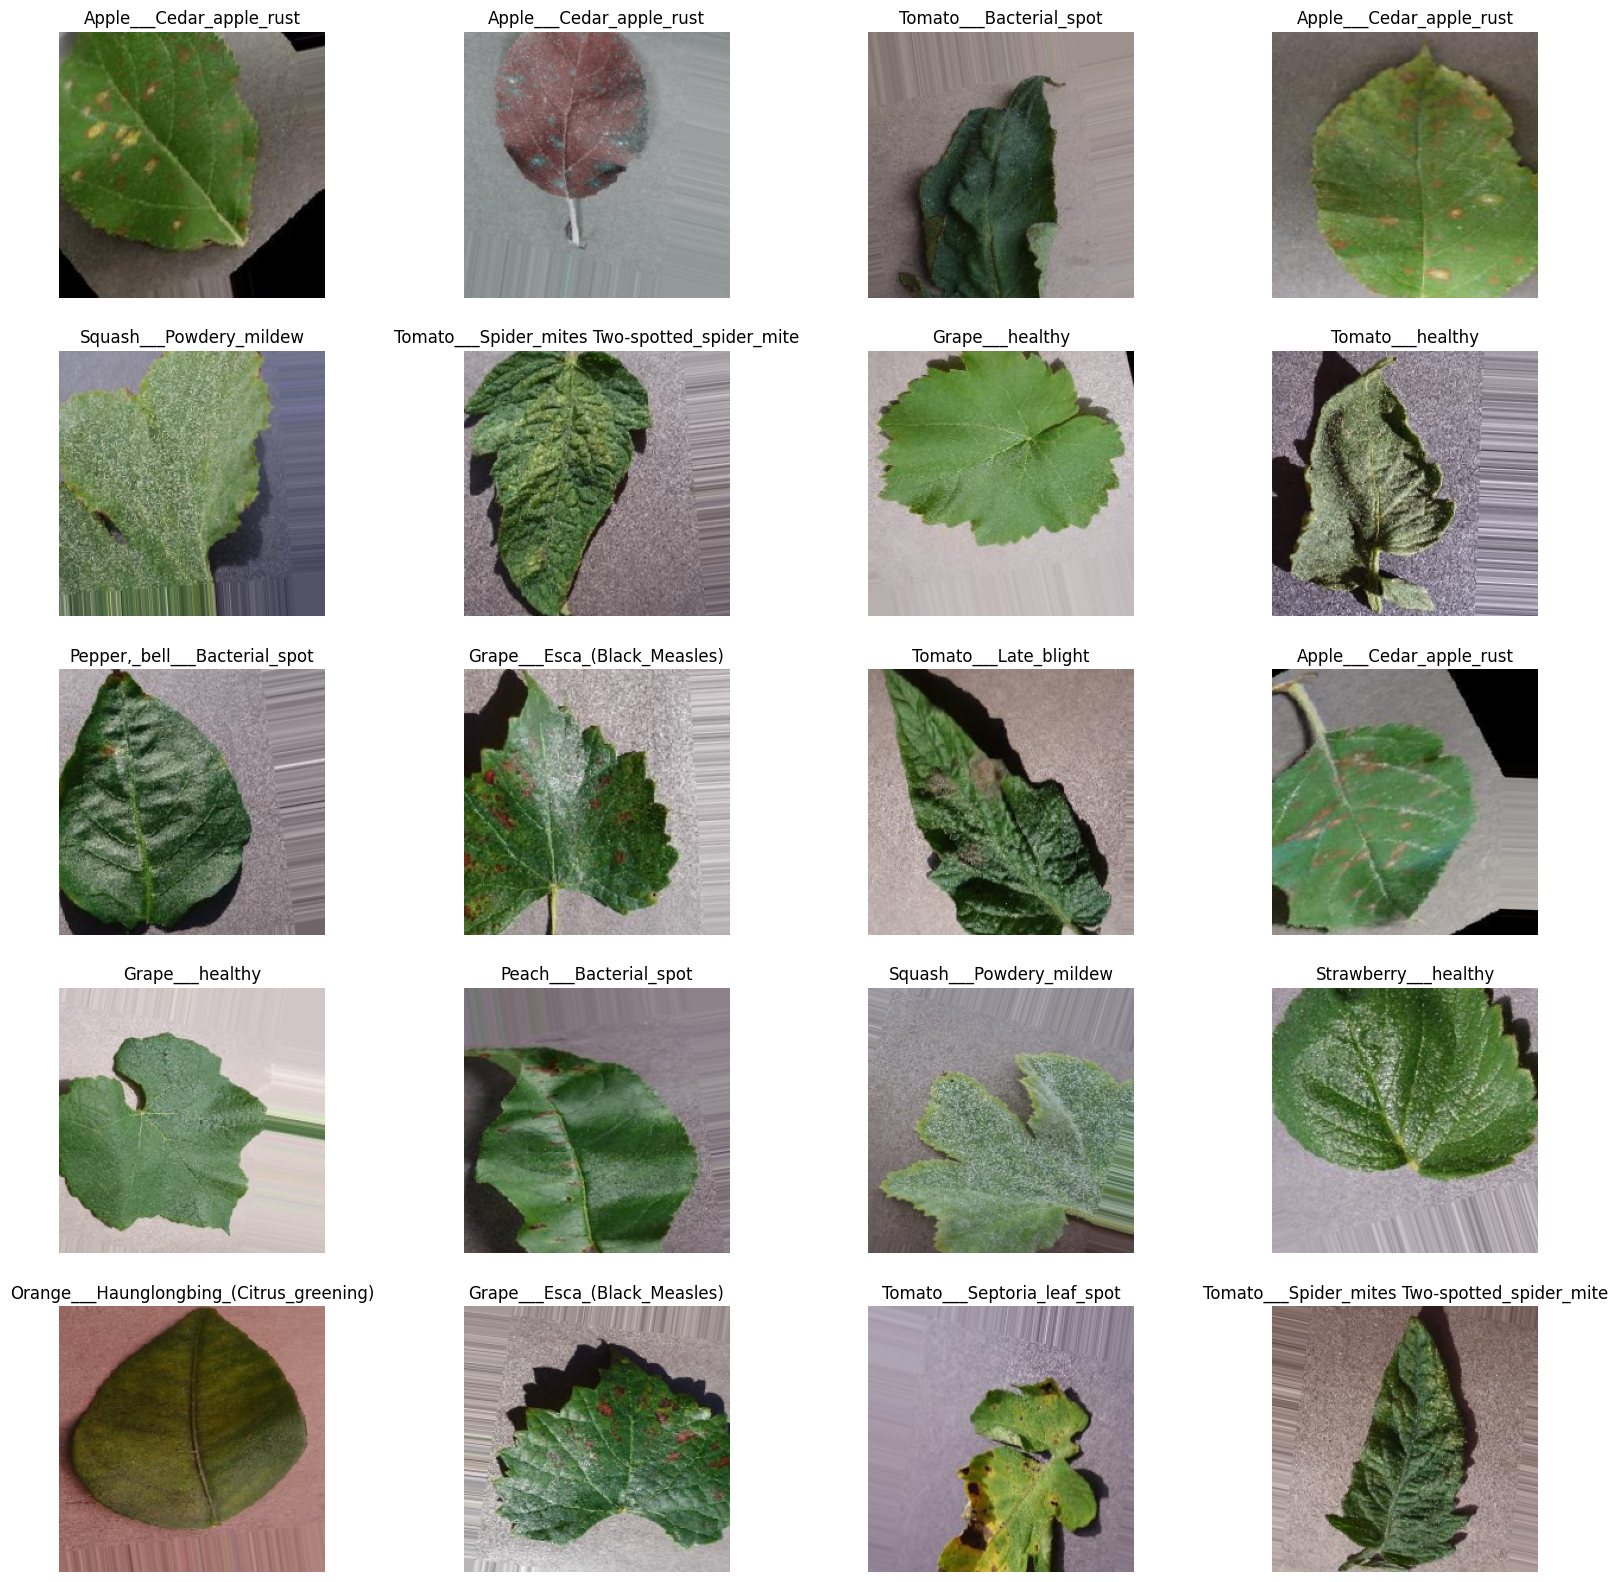

In [11]:
# Reverse the mapping of class indices to class names
reverse_class_mapping = {}
for class_name, class_index in train_generator.class_indices.items():
    reverse_class_mapping[class_index] = class_name

# Visualize a few sample images from the training set
images, labels = next(train_generator)
plt.figure(figsize=(20, 20))
for i in range(20):
    plt.subplot(5, 4, i + 1)  # 5 rows, 4 columns layout for 20 images
    plt.imshow(images[i])
    #labels are one-hot encoded, decode to get the actual label
    label_index = np.argmax(labels[i])
    actual_label = reverse_class_mapping[label_index]
    plt.title(actual_label)
    plt.axis('off')
plt.show()


# Initializing CNN Model

In [ ]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(38, activation='softmax')  # Adjust the number of units based on the number of classes
])




# Compiling Model

In [ ]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])